RÉDUCTION DE DIMENSIONNALITÉ - DÉTECTION ANOMALIES FINANCIÈRES
Dataset: Taiwanese Bankruptcy Prediction

1. CHARGEMENT DES DONNÉES
--------------------------------------------------------------------------------
✅ Données avec features sélectionnées chargées
Dimensions: (6819, 18)
Features: 17
Observations: 6,819

Distribution target:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

2. PCA - PRINCIPAL COMPONENT ANALYSIS

📊 Application de la PCA...

✅ PCA appliquée avec succès
Nombre de composantes: 17

📈 Variance expliquée:
   85% de variance: 1 composantes
   90% de variance: 1 composantes
   95% de variance: 1 composantes
   99% de variance: 1 composantes


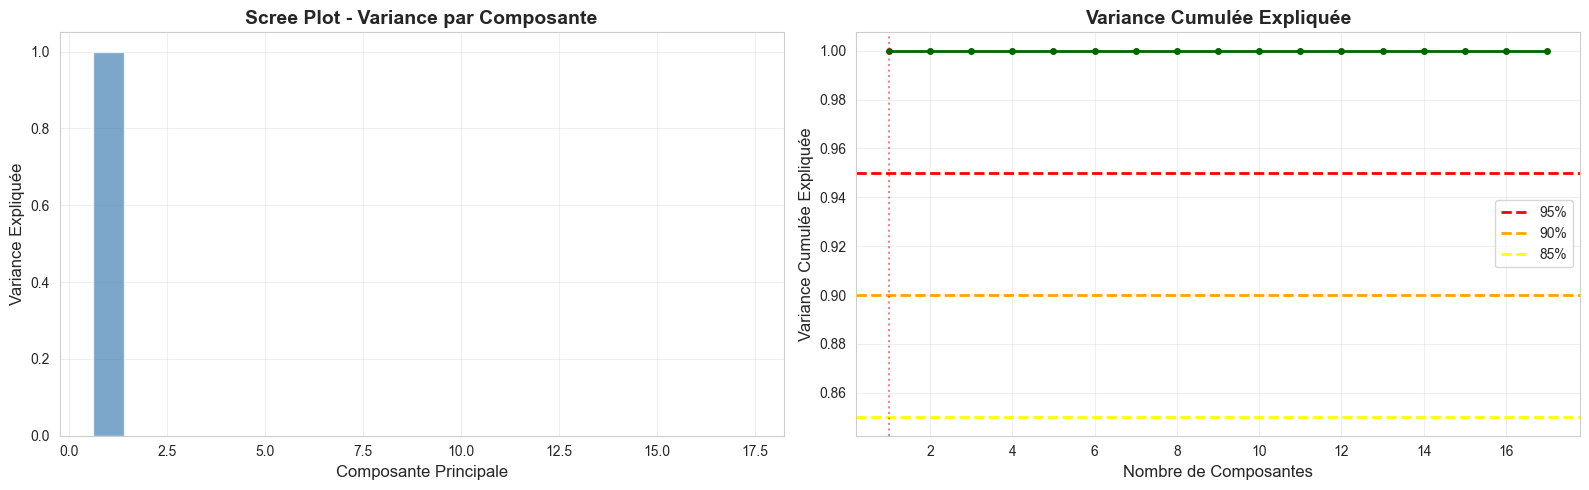


✅ Graphique sauvegardé: pca_variance.png

📊 PCA à 2 dimensions pour visualisation...
Variance expliquée par PC1: 100.00%
Variance expliquée par PC2: 0.00%
Variance totale (2D): 100.00%


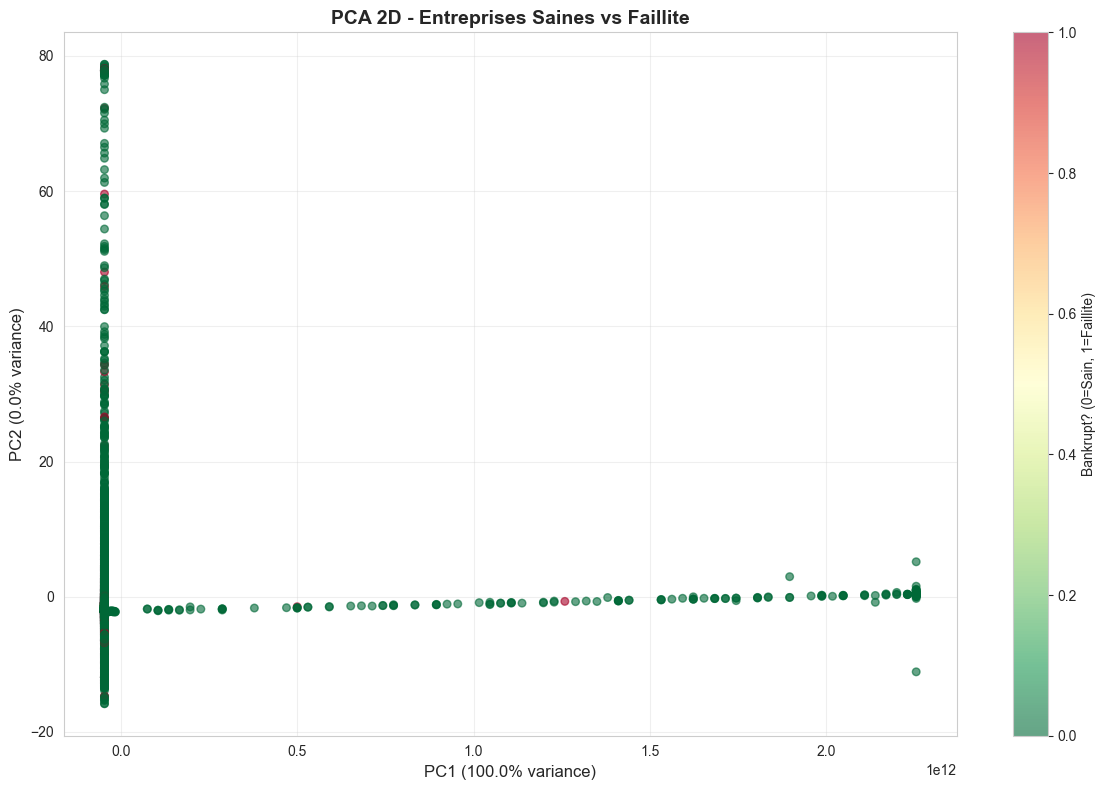


📊 PCA à 3 dimensions...
Variance totale (3D): 100.00%
✅ Graphique 3D interactif sauvegardé: pca_3d_interactive.html

📋 Top 5 features contribuant à PC1:
                                  Feature       Loading
15    Interest-bearing debt interest rate  1.000000e+00
7      Degree of Financial Leverage (DFL)  1.062730e-12
16                  Net Value Growth Rate  3.250047e-13
6                  Interest Expense Ratio  2.861847e-13
10   Continuous interest rate (after tax)  2.827463e-13

3. t-SNE - VISUALISATION NON-LINÉAIRE

⚠️ Utilisation d'un échantillon de 3000 observations pour t-SNE

📊 Application de t-SNE (peut prendre quelques minutes)...
   Perplexity = 30...
   Perplexity = 50...
✅ t-SNE appliqué avec succès


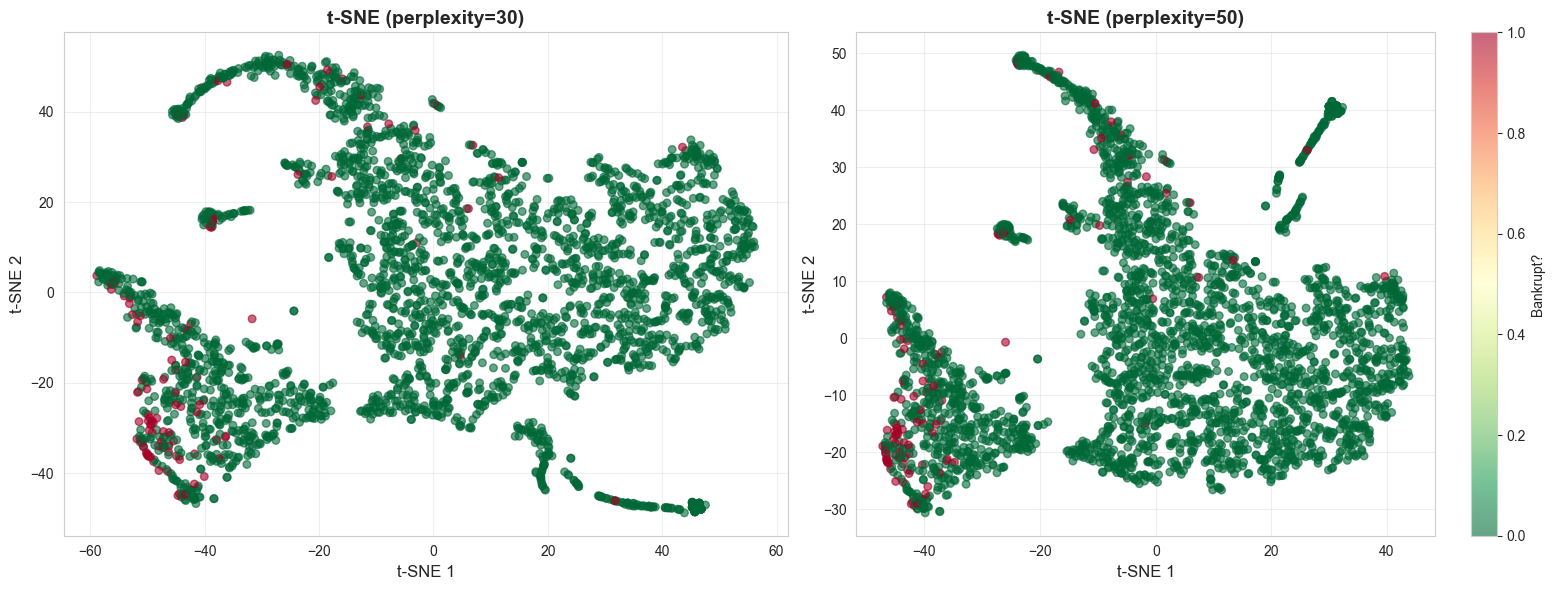


4. LLE - LOCALLY LINEAR EMBEDDING

📊 Application de LLE...
✅ LLE appliqué (n_neighbors=10)


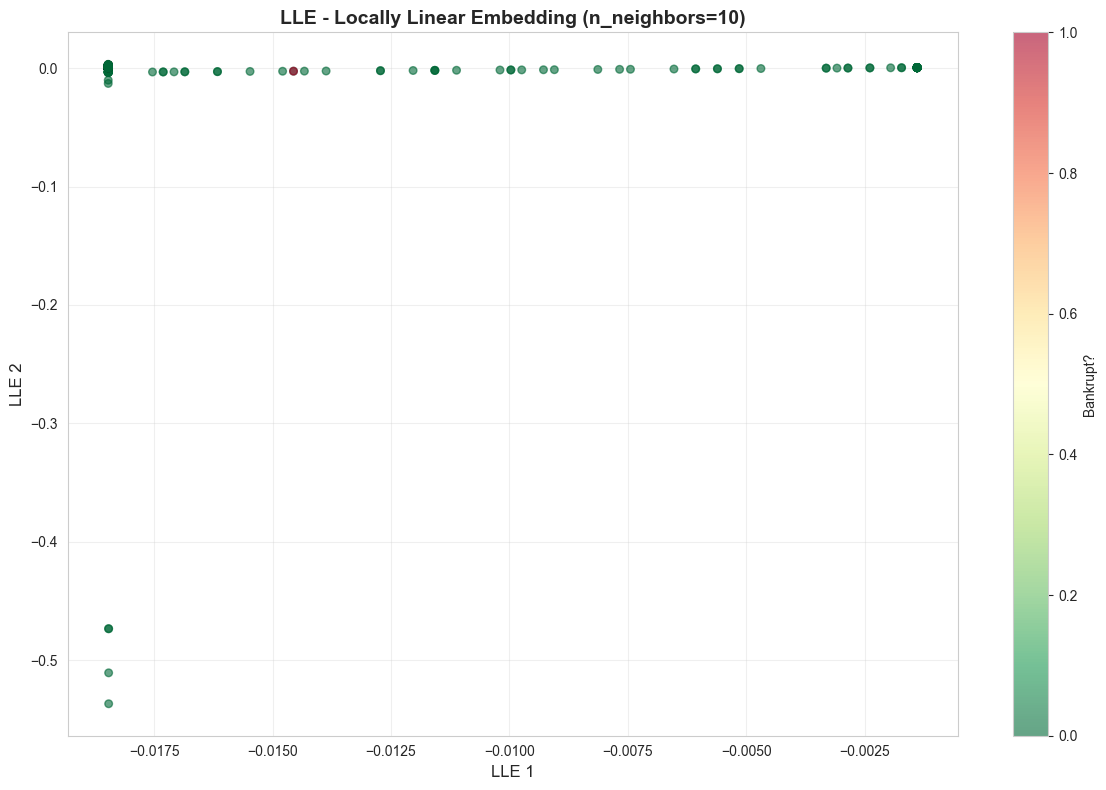


5. COMPARAISON DES MÉTHODES DE RÉDUCTION


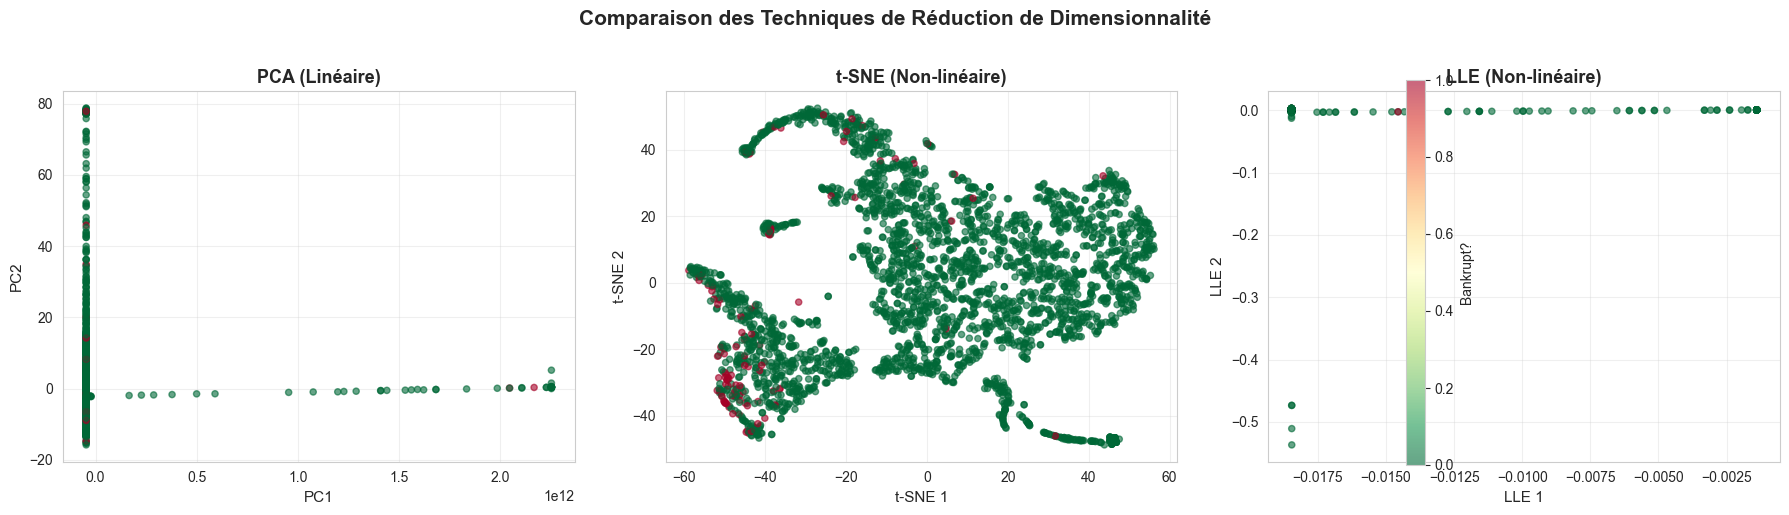


6. RECOMMANDATION: NOMBRE OPTIMAL DE COMPOSANTES
--------------------------------------------------------------------------------

📊 PCA avec 1 composantes (95% variance)
   Dimensions originales: (6819, 17)
   Dimensions réduites: (6819, 1)
   Réduction: 94.1%
   Variance conservée: 100.00%

✅ Dataset avec PCA sauvegardé: financial_data_pca.csv
✅ Modèle PCA sauvegardé: pca_model.pkl

7. ANALYSE DE SÉPARABILITÉ DES CLASSES
--------------------------------------------------------------------------------

Score de Silhouette (mesure de séparation des clusters):
   PCA: 0.3168
   t-SNE: 0.1544
   LLE: -0.6214

💡 Interprétation:
   Score proche de 1: Excellente séparation
   Score proche de 0: Clusters se chevauchent
   Score négatif: Mauvaise séparation

RÉSUMÉ - RÉDUCTION DE DIMENSIONNALITÉ

RÉSULTATS DE LA RÉDUCTION DE DIMENSIONNALITÉ
Dataset: Taiwanese Bankruptcy Prediction

DIMENSIONS ORIGINALES:
---------------------
• Features: 17
• Observations: 6,819

PCA (PRINCIPAL COMPONENT ANA

In [2]:
# ================================================================================
# NOTEBOOK 4: RÉDUCTION DE DIMENSIONNALITÉ
# Dataset: Taiwanese Bankruptcy Prediction
# Fichier: notebooks/04_dimensionality_reduction.ipynb
# ================================================================================

"""
PROJET: Détection d'Anomalies Financières
Ce notebook applique des techniques de réduction de dimensionnalité :
- PCA (Principal Component Analysis)
- t-SNE (t-Distributed Stochastic Neighbor Embedding)
- LLE (Locally Linear Embedding)
"""

# ================================================================================
# IMPORTS
# ================================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 80)
print("RÉDUCTION DE DIMENSIONNALITÉ - DÉTECTION ANOMALIES FINANCIÈRES")
print("Dataset: Taiwanese Bankruptcy Prediction")
print("=" * 80)

# ================================================================================
# 1. CHARGEMENT DES DONNÉES
# ================================================================================

print("\n1. CHARGEMENT DES DONNÉES")
print("-" * 80)

# Charger les données avec features sélectionnées
try:
    df = pd.read_csv('../data/cleaned/financial_data_selected_features.csv')
    print("✅ Données avec features sélectionnées chargées")
except FileNotFoundError:
    # Si pas encore de sélection, charger les données nettoyées
    df = pd.read_csv('../data/cleaned/financial_data_cleaned.csv')
    print("⚠️ Utilisation des données nettoyées (toutes les features)")

print(f"Dimensions: {df.shape}")

# Séparer features et target
target_col = 'Bankrupt?'
X = df.drop(target_col, axis=1)
y = df[target_col]

print(f"Features: {X.shape[1]}")
print(f"Observations: {X.shape[0]:,}")
print(f"\nDistribution target:")
print(y.value_counts())

# ================================================================================
# 2. PCA - PRINCIPAL COMPONENT ANALYSIS
# ================================================================================

print("\n" + "=" * 80)
print("2. PCA - PRINCIPAL COMPONENT ANALYSIS")
print("=" * 80)

# Appliquer PCA avec toutes les composantes
print("\n📊 Application de la PCA...")
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)

# Variance expliquée
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\n✅ PCA appliquée avec succès")
print(f"Nombre de composantes: {len(explained_variance)}")

# Trouver le nombre de composantes pour 95% de variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1

print(f"\n📈 Variance expliquée:")
print(f"   85% de variance: {n_components_85} composantes")
print(f"   90% de variance: {n_components_90} composantes")
print(f"   95% de variance: {n_components_95} composantes")
print(f"   99% de variance: {np.argmax(cumulative_variance >= 0.99) + 1} composantes")

# Visualisation: Scree Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Variance individuelle
axes[0].bar(range(1, min(21, len(explained_variance)+1)), 
            explained_variance[:20], 
            color='steelblue', alpha=0.7)
axes[0].set_xlabel('Composante Principale', fontsize=12)
axes[0].set_ylabel('Variance Expliquée', fontsize=12)
axes[0].set_title('Scree Plot - Variance par Composante', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Variance cumulée
axes[1].plot(range(1, len(cumulative_variance)+1), cumulative_variance, 
             'o-', color='darkgreen', linewidth=2, markersize=4)
axes[1].axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95%')
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90%')
axes[1].axhline(y=0.85, color='yellow', linestyle='--', linewidth=2, label='85%')
axes[1].axvline(x=n_components_95, color='red', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Nombre de Composantes', fontsize=12)
axes[1].set_ylabel('Variance Cumulée Expliquée', fontsize=12)
axes[1].set_title('Variance Cumulée Expliquée', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/cleaned/pca_variance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✅ Graphique sauvegardé: pca_variance.png")

# PCA à 2 dimensions pour visualisation
print("\n📊 PCA à 2 dimensions pour visualisation...")
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

variance_2d = pca_2d.explained_variance_ratio_
print(f"Variance expliquée par PC1: {variance_2d[0]:.2%}")
print(f"Variance expliquée par PC2: {variance_2d[1]:.2%}")
print(f"Variance totale (2D): {variance_2d.sum():.2%}")

# Visualisation 2D
plt.figure(figsize=(12, 8))
colors = ['#2ecc71' if label == 0 else '#e74c3c' for label in y]
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                     c=y, cmap='RdYlGn_r', alpha=0.6, s=30)
plt.xlabel(f'PC1 ({variance_2d[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({variance_2d[1]:.1%} variance)', fontsize=12)
plt.title('PCA 2D - Entreprises Saines vs Faillite', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Bankrupt? (0=Sain, 1=Faillite)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/cleaned/pca_2d_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

# PCA à 3 dimensions
print("\n📊 PCA à 3 dimensions...")
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

variance_3d = pca_3d.explained_variance_ratio_
print(f"Variance totale (3D): {variance_3d.sum():.2%}")

# Visualisation 3D interactive
fig = px.scatter_3d(
    x=X_pca_3d[:, 0], 
    y=X_pca_3d[:, 1], 
    z=X_pca_3d[:, 2],
    color=y.values,
    labels={'color': 'Bankrupt?'},
    title='PCA 3D - Visualisation Interactive',
    color_continuous_scale='RdYlGn_r',
    opacity=0.6
)

fig.update_layout(
    scene=dict(
        xaxis_title=f'PC1 ({variance_3d[0]:.1%})',
        yaxis_title=f'PC2 ({variance_3d[1]:.1%})',
        zaxis_title=f'PC3 ({variance_3d[2]:.1%})'
    )
)

fig.write_html('../data/cleaned/pca_3d_interactive.html')
print(f"✅ Graphique 3D interactif sauvegardé: pca_3d_interactive.html")

# Analyse des composantes principales
print("\n📋 Top 5 features contribuant à PC1:")
pc1_loadings = pd.DataFrame({
    'Feature': X.columns,
    'Loading': np.abs(pca_full.components_[0])
}).sort_values('Loading', ascending=False)
print(pc1_loadings.head(5))

# ================================================================================
# 3. t-SNE - t-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING
# ================================================================================

print("\n" + "=" * 80)
print("3. t-SNE - VISUALISATION NON-LINÉAIRE")
print("=" * 80)

# Utiliser un échantillon pour accélérer le calcul
sample_size = min(3000, len(X))
if len(X) > sample_size:
    print(f"\n⚠️ Utilisation d'un échantillon de {sample_size} observations pour t-SNE")
    indices = np.random.choice(len(X), sample_size, replace=False)
    X_sample = X.iloc[indices]
    y_sample = y.iloc[indices]
else:
    X_sample = X
    y_sample = y

print("\n📊 Application de t-SNE (peut prendre quelques minutes)...")

# t-SNE avec différents perplexity
perplexities = [30, 50]
tsne_results = {}

for perplexity in perplexities:
    print(f"   Perplexity = {perplexity}...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, 
                max_iter=1000, verbose=0)
    X_tsne = tsne.fit_transform(X_sample)
    tsne_results[perplexity] = X_tsne

print("✅ t-SNE appliqué avec succès")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, perplexity in enumerate(perplexities):
    X_tsne = tsne_results[perplexity]
    
    scatter = axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                               c=y_sample, cmap='RdYlGn_r', 
                               alpha=0.6, s=30)
    axes[idx].set_xlabel('t-SNE 1', fontsize=12)
    axes[idx].set_ylabel('t-SNE 2', fontsize=12)
    axes[idx].set_title(f't-SNE (perplexity={perplexity})', 
                        fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    if idx == 1:
        plt.colorbar(scatter, ax=axes[idx], label='Bankrupt?')

plt.tight_layout()
plt.savefig('../data/cleaned/tsne_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 4. LLE - LOCALLY LINEAR EMBEDDING
# ================================================================================

print("\n" + "=" * 80)
print("4. LLE - LOCALLY LINEAR EMBEDDING")
print("=" * 80)

print("\n📊 Application de LLE...")

# LLE
n_neighbors = 10
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=n_neighbors, 
                             random_state=42)

# Utiliser le même échantillon que t-SNE
X_lle = lle.fit_transform(X_sample)

print(f"✅ LLE appliqué (n_neighbors={n_neighbors})")

# Visualisation
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], 
                     c=y_sample, cmap='RdYlGn_r', 
                     alpha=0.6, s=30)
plt.xlabel('LLE 1', fontsize=12)
plt.ylabel('LLE 2', fontsize=12)
plt.title(f'LLE - Locally Linear Embedding (n_neighbors={n_neighbors})', 
          fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Bankrupt?')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/cleaned/lle_2d.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 5. COMPARAISON DES MÉTHODES
# ================================================================================

print("\n" + "=" * 80)
print("5. COMPARAISON DES MÉTHODES DE RÉDUCTION")
print("=" * 80)

# Visualisation comparative
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA
scatter1 = axes[0].scatter(X_pca_2d[:sample_size, 0], X_pca_2d[:sample_size, 1], 
                          c=y_sample, cmap='RdYlGn_r', alpha=0.6, s=20)
axes[0].set_xlabel('PC1', fontsize=11)
axes[0].set_ylabel('PC2', fontsize=11)
axes[0].set_title('PCA (Linéaire)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# t-SNE
scatter2 = axes[1].scatter(tsne_results[30][:, 0], tsne_results[30][:, 1], 
                          c=y_sample, cmap='RdYlGn_r', alpha=0.6, s=20)
axes[1].set_xlabel('t-SNE 1', fontsize=11)
axes[1].set_ylabel('t-SNE 2', fontsize=11)
axes[1].set_title('t-SNE (Non-linéaire)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# LLE
scatter3 = axes[2].scatter(X_lle[:, 0], X_lle[:, 1], 
                          c=y_sample, cmap='RdYlGn_r', alpha=0.6, s=20)
axes[2].set_xlabel('LLE 1', fontsize=11)
axes[2].set_ylabel('LLE 2', fontsize=11)
axes[2].set_title('LLE (Non-linéaire)', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.colorbar(scatter3, ax=axes, label='Bankrupt?')
plt.suptitle('Comparaison des Techniques de Réduction de Dimensionnalité', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../data/cleaned/dimensionality_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ================================================================================
# 6. SÉLECTION DU NOMBRE OPTIMAL DE COMPOSANTES PCA
# ================================================================================

print("\n6. RECOMMANDATION: NOMBRE OPTIMAL DE COMPOSANTES")
print("-" * 80)

# Créer dataset avec nombre optimal de composantes
optimal_n_components = n_components_95  # 95% de variance

pca_optimal = PCA(n_components=optimal_n_components)
X_pca_optimal = pca_optimal.fit_transform(X)

print(f"\n📊 PCA avec {optimal_n_components} composantes (95% variance)")
print(f"   Dimensions originales: {X.shape}")
print(f"   Dimensions réduites: {X_pca_optimal.shape}")
print(f"   Réduction: {(1 - X_pca_optimal.shape[1]/X.shape[1])*100:.1f}%")
print(f"   Variance conservée: {pca_optimal.explained_variance_ratio_.sum():.2%}")

# Sauvegarder les données avec PCA
df_pca = pd.DataFrame(
    X_pca_optimal,
    columns=[f'PC{i+1}' for i in range(optimal_n_components)]
)
df_pca[target_col] = y.values

df_pca.to_csv('../data/cleaned/financial_data_pca.csv', index=False)
print(f"\n✅ Dataset avec PCA sauvegardé: financial_data_pca.csv")

# Sauvegarder le modèle PCA
import pickle
with open('../data/cleaned/pca_model.pkl', 'wb') as f:
    pickle.dump(pca_optimal, f)
print(f"✅ Modèle PCA sauvegardé: pca_model.pkl")

# ================================================================================
# 7. ANALYSE DE SÉPARABILITÉ DES CLASSES
# ================================================================================

print("\n7. ANALYSE DE SÉPARABILITÉ DES CLASSES")
print("-" * 80)

from sklearn.metrics import silhouette_score

methods = {
    'PCA': X_pca_2d[:sample_size],
    't-SNE': tsne_results[30],
    'LLE': X_lle
}

print("\nScore de Silhouette (mesure de séparation des clusters):")
for name, data in methods.items():
    score = silhouette_score(data, y_sample)
    print(f"   {name}: {score:.4f}")

print("\n💡 Interprétation:")
print("   Score proche de 1: Excellente séparation")
print("   Score proche de 0: Clusters se chevauchent")
print("   Score négatif: Mauvaise séparation")

# ================================================================================
# 8. RÉSUMÉ ET RECOMMANDATIONS
# ================================================================================

print("\n" + "=" * 80)
print("RÉSUMÉ - RÉDUCTION DE DIMENSIONNALITÉ")
print("=" * 80)

summary = f"""
RÉSULTATS DE LA RÉDUCTION DE DIMENSIONNALITÉ
============================================
Dataset: Taiwanese Bankruptcy Prediction

DIMENSIONS ORIGINALES:
---------------------
• Features: {X.shape[1]}
• Observations: {X.shape[0]:,}

PCA (PRINCIPAL COMPONENT ANALYSIS):
-----------------------------------
• Composantes pour 85% variance: {n_components_85}
• Composantes pour 90% variance: {n_components_90}
• Composantes pour 95% variance: {n_components_95}
• Réduction recommandée: {optimal_n_components} composantes

VARIANCE EXPLIQUÉE (2D):
-----------------------
• PC1: {variance_2d[0]:.2%}
• PC2: {variance_2d[1]:.2%}
• Total: {variance_2d.sum():.2%}

MÉTHODES APPLIQUÉES:
-------------------
✓ PCA (linéaire) - {optimal_n_components} composantes
✓ t-SNE (non-linéaire) - visualisation 2D
✓ LLE (non-linéaire) - visualisation 2D

FICHIERS GÉNÉRÉS:
----------------
✓ financial_data_pca.csv (dataset avec {optimal_n_components} composantes)
✓ pca_model.pkl (modèle PCA sauvegardé)
✓ Graphiques de visualisation:
  - pca_variance.png
  - pca_2d_scatter.png
  - pca_3d_interactive.html
  - tsne_comparison.png
  - lle_2d.png
  - dimensionality_comparison.png

RECOMMANDATIONS:
---------------
1. Utiliser PCA avec {optimal_n_components} composantes pour la modélisation
2. PCA conserve {pca_optimal.explained_variance_ratio_.sum():.1%}% de l'information
3. Réduction de {(1 - optimal_n_components/X.shape[1])*100:.1f}% du nombre de features
4. t-SNE et LLE utiles pour visualisation uniquement

AVANTAGES DE LA RÉDUCTION:
--------------------------
✓ Moins de features = modèles plus rapides
✓ Réduction du sur-apprentissage
✓ Élimination du bruit
✓ Visualisation possible en 2D/3D
✓ Meilleure interprétabilité

PROCHAINE ÉTAPE:
---------------
→ Notebook 05: Modélisation (05_modeling.ipynb)
  Utiliser soit:
  - financial_data_selected_features.csv (features sélectionnées)
  - financial_data_pca.csv (composantes principales)
"""

print(summary)

# Sauvegarder le rapport
with open('../data/cleaned/dimensionality_reduction_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✅ Réduction de dimensionnalité terminée!")
print("📄 Rapport sauvegardé: dimensionality_reduction_report.txt")
print("=" * 80)